In [39]:
import json
import time
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict

In [ ]:
path = 'Data\yelp_reviews\yelp_academic_dataset_review.json'
file = open(path, encoding = 'utf8')

In [4]:
# Reading in the data
data = []
for i in range(50000):
    data.append(json.loads(file.readline()))
data[0]

{'review_id': 'lWC-xP3rd6obsecCYsGZRg',
 'user_id': 'ak0TdVmGKo4pwqdJSTLwWw',
 'business_id': 'buF9druCkbuXLX526sGELQ',
 'stars': 4.0,
 'useful': 3,
 'funny': 1,
 'cool': 1,
 'text': "Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. \n\nAfter reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle bolognese and a four cheese filled pasta in a 

In [7]:
# Creating 2 additional keys/columns with time features
for record in data:
    record['timeStruct'] = time.strptime(record['date'], '%Y-%m-%d %H:%M:%S')
    record['timeInt'] = time.mktime(record['timeStruct'])
    record['day'] = record['timeStruct'].tm_wday
data[0]

{'review_id': 'lWC-xP3rd6obsecCYsGZRg',
 'user_id': 'ak0TdVmGKo4pwqdJSTLwWw',
 'business_id': 'buF9druCkbuXLX526sGELQ',
 'stars': 4.0,
 'useful': 3,
 'funny': 1,
 'cool': 1,
 'text': "Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. \n\nAfter reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle bolognese and a four cheese filled pasta in a 

In [21]:
# Calculating the average ratings per day
# Method 1: My method
weekCount = defaultdict(int)

for record in data:
    weekCount[record['day']] += 1

weekAverages = defaultdict(int)

for record in data:
    weekAverages[record['day']] += record['stars'] / weekCount[record['day']]

weekAverages

defaultdict(int,
            {5: 3.7421045558394646,
             4: 3.820620807986525,
             1: 3.804724880382875,
             3: 3.80096126660976,
             6: 3.7154450261781724,
             0: 3.7267171515875934,
             2: 3.8222745532626696})

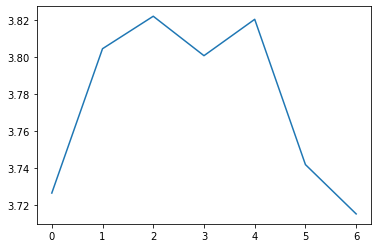

In [42]:
# Since our previous dictionary is a mess
# We use OrderedDict to sort the dictionary by the key value
weekAverages = OrderedDict(sorted(weekAverages.items()))

# Converting days and scores into individual lists
days = list(weekAverages.keys())
scores = list(weekAverages.values())

# Plotting the line plot
plt.plot(days, scores)

<BarContainer object of 7 artists>

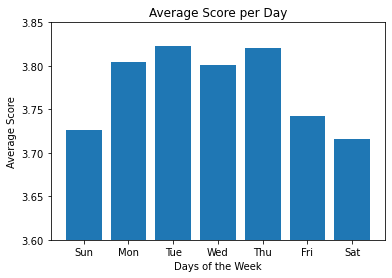

In [51]:
# Plotting a bar plot
# Use plt.ylim to define the y limits of the chart

# We're defining it between 3.6 and 3.85 so we can have a better granular look at the data
plt.ylim(3.6, 3.85)

# Giving the axis labels
plt.xlabel('Days of the Week')
plt.ylabel('Average Score')

# Remapping the axis ticks label
plt.xticks([0,1,2,3,4,5,6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Changing the chart title
plt.title('Average Score per Day')
plt.bar(days, scores)